In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import qutip as qtp
%matplotlib inline
%matplotlib widget 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [26]:
wo=1 #qubit frequencies
sm1=qtp.tensor(qtp.qeye(2),qtp.destroy(2))
sm2=qtp.tensor(qtp.destroy(2),qtp.qeye(2))
gamma=0.05 #decay for the 11 and 22 rate
beta=0.9 #fraction of the emitted captured by propagated mode times exponential
#of minus the saparation of the qubit by the plasmon length
kd=2*np.pi
g12=gamma/2*beta*np.sin(kd)
gamma12=gamma*beta*np.cos(kd)
tlist=np.linspace(0,200,200)

Now we define the Hamiltonian: (I will use units such that $\hbar$ =1)

Also, I will define the Liouvillian, adding manually the Linblad terms as it is not as simple as in other calculations, here we have mixed terms.

In [27]:
H=wo*(sm1.dag()*sm1+sm2.dag()*sm2)+g12*(sm1.dag()*sm2+sm2.dag()*sm1)
lin11=qtp.lindblad_dissipator(sm1)
lin22=qtp.lindblad_dissipator(sm2)
lin12=qtp.lindblad_dissipator(sm1,sm2)
lin21=qtp.lindblad_dissipator(sm2,sm1)
L=qtp.liouvillian(H)+gamma*(lin11+lin22)+gamma12*(lin12+lin21)

Now I will run the dynamics of each state, including the mixture of states.

In [28]:
psi_i=qtp.tensor(qtp.basis(2,1),qtp.basis(2,0))
rhoev=qtp.mesolve(L,psi_i,tlist)

In [29]:
C=[]
for n in range(len(tlist)):
    C.append(qtp.concurrence(rhoev.states[n]))

Text(0, 0.5, 'Concurrence')

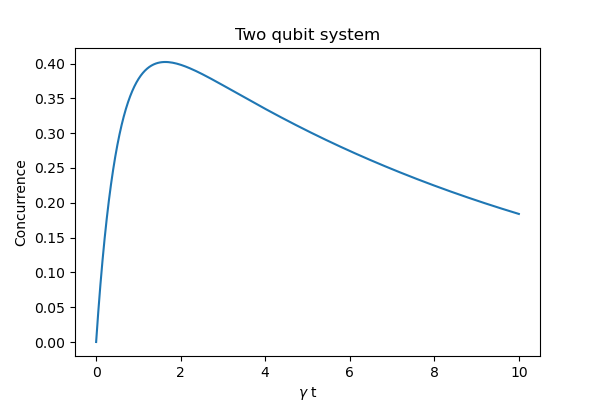

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(gamma*tlist,C)
plt.title("Two qubit system")
plt.xlabel("$\gamma$ t")
plt.ylabel("Concurrence")